In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import NullLocator
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import numpy as np
import sys
import xarray as xr
from u import *
import pandas as pd

In [622]:
ds = xr.open_dataset("/home/rlan/GC13/nested_1997_2019/nested_2018/OutputDir/GEOSChem.SpeciesConc.20181030_0000z.nc4")
#convert mol/mol to ug/m3
#1 mol of air = 22.4 L = 22.4 * 0.001 m3
#1 mol of BC + OC = 24 g = 24e+6 ug
factor = 24e+6 / 22.4 / 0.001
PM = factor*(2 * ds['SpeciesConc_OCPO'] + 2 * ds['SpeciesConc_OCPI'] + ds['SpeciesConc_BCPO'] + ds['SpeciesConc_BCPI'])
PM = PM.isel(lev=0)

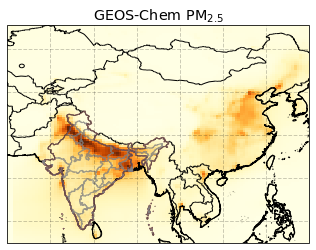

In [609]:
color = plt.cm.YlOrBr
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=[8, 4])
ax = plt.axes(projection=ccrs.PlateCarree())
img = PM.plot(ax=ax, cmap=color,vmax=120, add_colorbar=False)
ax.set_title(r'GEOS-Chem $\rm PM_{2.5}$');
ax.coastlines()
ax.set_extent([60.0, 130.0, 5.0, 50])
gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                  draw_labels=False,
                  linewidth=1, 
                  color='black', 
                  alpha=0.2,
                  linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
ax.coastlines(color='black', 
              linewidth=1, 
              resolution='10m')
ax.add_feature(cfeature.BORDERS.with_scale('10m'),
              linestyle='-',)

india = '/home/rlan/GC13/India_shapefile/gadm36_IND_0.shp'
shape_india = ShapelyFeature(Reader(india).geometries(), 
                             ccrs.PlateCarree(), 
                             edgecolor='brown', 
                             alpha=0.5, 
                             facecolor="none")
ax.add_feature(shape_india)

state = '/home/rlan/GC13/India_shapefile/gadm36_IND_1.shp'
shape_states = ShapelyFeature(Reader(state).geometries(), 
                              ccrs.PlateCarree(), 
                              edgecolor='gray', 
                              alpha=0.5, 
                              facecolor="none")
ax.add_feature(shape_states)

In [128]:
base = Path('/home/rlan/GC13/nested_1997_2019')
year = 2019
year_dir  = base / f'nested_{year}' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}1001_0000z.nc4'
print(year_dir)

/home/rlan/GC13/nested_1997_2019/nested_2019/Output_monthly/GEOSChem.SpeciesConc.20191001_0000z.nc4


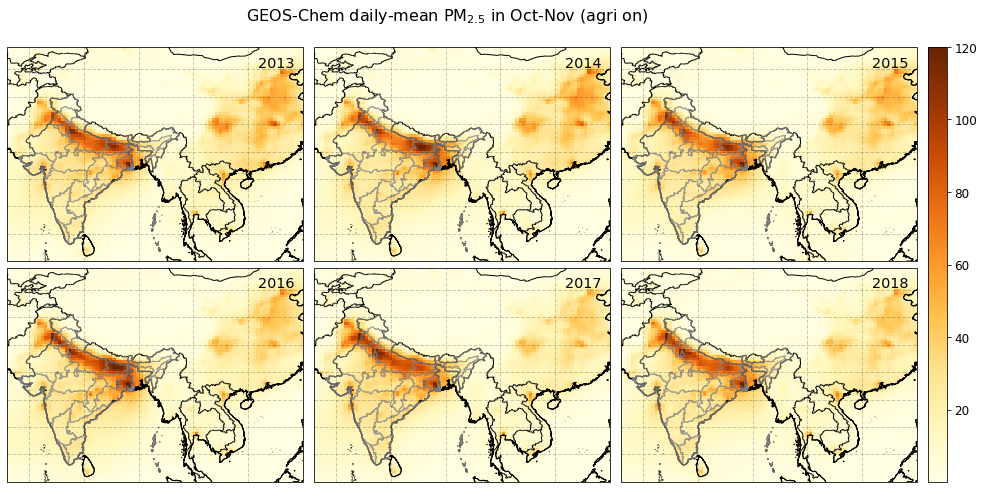

In [585]:
def read(path):
    ds = xr.open_dataset(path).isel(lev=0)
    ds = 2*ds['SpeciesConc_OCPO'] + 2*ds['SpeciesConc_OCPI'] + ds['SpeciesConc_BCPO'] + ds['SpeciesConc_BCPI']
    return ds[0]

color = plt.cm.YlOrBr
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = "Helvetica"
fig, a = plt.subplots(2, 3, figsize=(16.5, 8), subplot_kw={'projection': ccrs.PlateCarree()}, sharex=True, sharey=True)
xticks = None
years = np.arange(2013, 2019)
base = Path('/home/rlan/GC13/nested_1997_2019')
for year, ax in zip(years, a.flatten()):
    year_dir_10  = base / f'nested_{year}' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}0930_0000z.nc4'
    year_dir_11  = base / f'nested_{year}' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}1030_0000z.nc4'
    PM = factor*(read(year_dir_10) + read(year_dir_11))/2
    img = PM.plot(ax=ax, 
              cmap=color,vmax=120, 
              add_colorbar=False)

    ax.set_title(f'{year}', x=0.91, y=1.0, pad=-20);
    ax.coastlines()
    ax.set_extent([66.0, 120.0, 5.0, 41])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                      draw_labels=False,
                      linewidth=1, color='black', 
                      alpha=0.2,
                      linestyle='--')
    
    gl.xlabels_top = False
    gl.ylabels_right = False
    ax.coastlines(color='black', 
                  linewidth=1, 
                  resolution='10m')
    ax.add_feature(cfeature.BORDERS.with_scale('10m'),
                   linestyle='-')

    india = '/home/rlan/GC13/India_shapefile/gadm36_IND_0.shp'
    shape_india = ShapelyFeature(Reader(india).geometries(), 
                                 ccrs.PlateCarree(), 
                                 edgecolor='darkred', 
                                 alpha=0.5, 
                                 facecolor="none")
    ax.add_feature(shape_india)

    state = '/home/rlan/GC13/India_shapefile/gadm36_IND_1.shp'
    shape_states = ShapelyFeature(Reader(state).geometries(), 
                                  ccrs.PlateCarree(), 
                                  edgecolor='brown', 
                                  alpha=0.5, 
                                  facecolor="none")
    ax.add_feature(shape_states)

plt.suptitle(r'GEOS-Chem daily-mean $\rm PM_{2.5}$ in Oct-Nov (agri on)', fontsize=16, y= 0.95)
plt.subplots_adjust(wspace=0.001, hspace=0.03)

cbar_ax = fig.add_axes([0.905, 0.125, 0.016, 0.755])
fig.colorbar(img, cax=cbar_ax)
plt.show()
fig.savefig('/home/rlan/GC13/figures/agri_on.png',format='png', dpi=600)   # save the figure to file
plt.close(fig) 

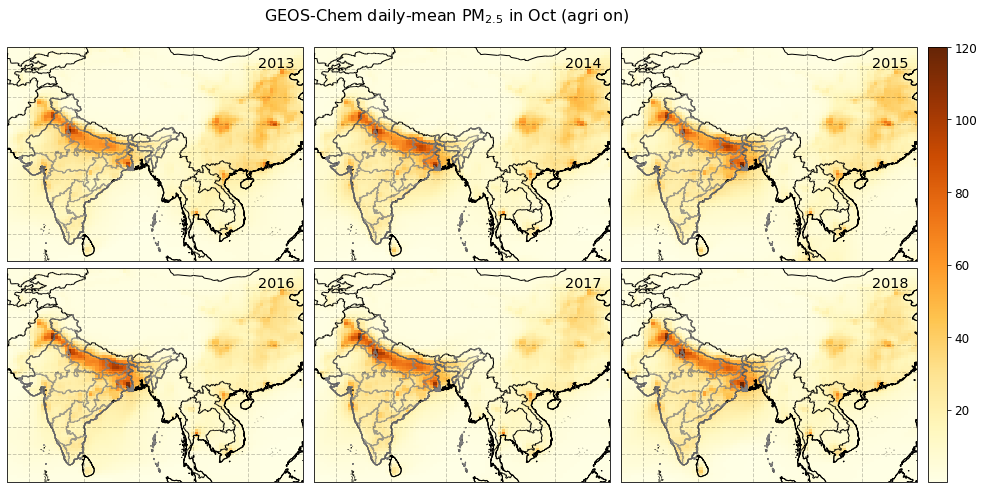

In [597]:
def read(path):
    ds = xr.open_dataset(path).isel(lev=0)
    ds = 2*ds['SpeciesConc_OCPO'] + 2*ds['SpeciesConc_OCPI'] + ds['SpeciesConc_BCPO'] + ds['SpeciesConc_BCPI']
    return ds[0]

color = plt.cm.YlOrBr
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = "Helvetica"
fig, a = plt.subplots(2, 3, figsize=(16.5, 8), subplot_kw={'projection': ccrs.PlateCarree()}, sharex=True, sharey=True)
xticks = None
years = np.arange(2013, 2019)
base = Path('/home/rlan/GC13/nested_1997_2019')
for year, ax in zip(years, a.flatten()):
    year_dir_10  = base / f'nested_{year}' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}0930_0000z.nc4'
    #year_dir_11  = base / f'nested_{year}' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}1030_0000z.nc4'
    PM = factor*read(year_dir_10)
    img = PM.plot(ax=ax, 
              cmap=color,vmax=120, 
              add_colorbar=False)

    ax.set_title(f'{year}', x=0.91, y=1.0, pad=-20);
    ax.coastlines()
    ax.set_extent([66.0, 120.0, 5.0, 41])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                      draw_labels=False,
                      linewidth=1, color='black', 
                      alpha=0.2,
                      linestyle='--')
    
    gl.xlabels_top = False
    gl.ylabels_right = False
    ax.coastlines(color='black', 
                  linewidth=1, 
                  resolution='10m')
    ax.add_feature(cfeature.BORDERS.with_scale('10m'),
                   linestyle='-')

    india = '/home/rlan/GC13/India_shapefile/gadm36_IND_0.shp'
    shape_india = ShapelyFeature(Reader(india).geometries(), 
                                 ccrs.PlateCarree(), 
                                 edgecolor='brown', 
                                 alpha=0.5, 
                                 facecolor="none")
    ax.add_feature(shape_india)

    state = '/home/rlan/GC13/India_shapefile/gadm36_IND_1.shp'
    shape_states = ShapelyFeature(Reader(state).geometries(), 
                                  ccrs.PlateCarree(), 
                                  edgecolor='gray', 
                                  alpha=0.5, 
                                  facecolor="none")
    ax.add_feature(shape_states)

plt.suptitle(r'GEOS-Chem daily-mean $\rm PM_{2.5}$ in Oct (agri on)', fontsize=16, y= 0.95)
plt.subplots_adjust(wspace=0.001, hspace=0.03)

cbar_ax = fig.add_axes([0.905, 0.125, 0.016, 0.755])
fig.colorbar(img, cax=cbar_ax)
plt.show()
fig.savefig('/home/rlan/GC13/figures/agri_on_oct.png',format='png', dpi=600)   # save the figure to file
plt.close(fig) 

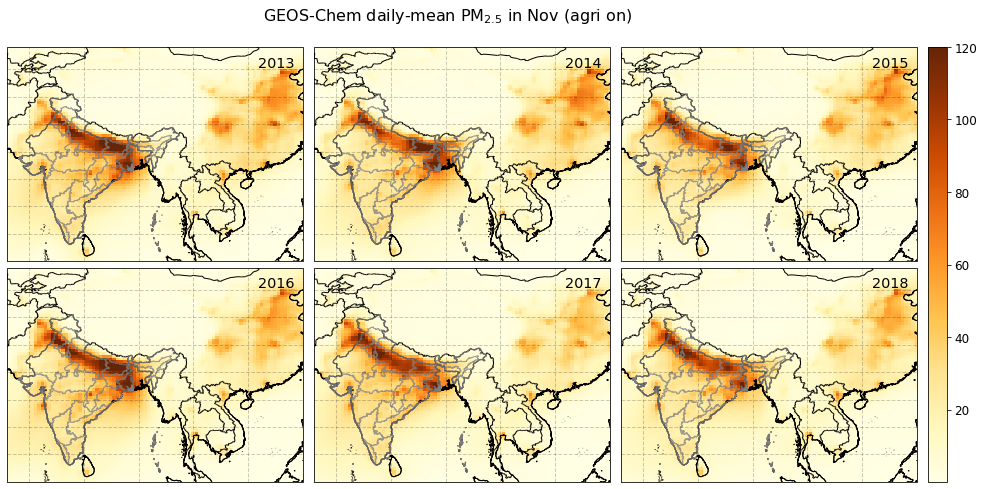

In [598]:
def read(path):
    ds = xr.open_dataset(path).isel(lev=0)
    ds = 2*ds['SpeciesConc_OCPO'] + 2*ds['SpeciesConc_OCPI'] + ds['SpeciesConc_BCPO'] + ds['SpeciesConc_BCPI']
    return ds[0]

color = plt.cm.YlOrBr
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = "Helvetica"
fig, a = plt.subplots(2, 3, figsize=(16.5, 8), subplot_kw={'projection': ccrs.PlateCarree()}, sharex=True, sharey=True)
xticks = None
years = np.arange(2013, 2019)
base = Path('/home/rlan/GC13/nested_1997_2019')
for year, ax in zip(years, a.flatten()):
    #year_dir_10  = base / f'nested_{year}' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}0930_0000z.nc4'
    year_dir_11  = base / f'nested_{year}' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}1030_0000z.nc4'
    PM = factor*read(year_dir_11)
    img = PM.plot(ax=ax, 
              cmap=color,vmax=120, 
              add_colorbar=False)

    ax.set_title(f'{year}', x=0.91, y=1.0, pad=-20);
    ax.coastlines()
    ax.set_extent([66.0, 120.0, 5.0, 41])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                      draw_labels=False,
                      linewidth=1, color='black', 
                      alpha=0.2,
                      linestyle='--')
    
    gl.xlabels_top = False
    gl.ylabels_right = False
    ax.coastlines(color='black', 
                  linewidth=1, 
                  resolution='10m')
    ax.add_feature(cfeature.BORDERS.with_scale('10m'),
                   linestyle='-')

    india = '/home/rlan/GC13/India_shapefile/gadm36_IND_0.shp'
    shape_india = ShapelyFeature(Reader(india).geometries(), 
                                 ccrs.PlateCarree(), 
                                 edgecolor='brown', 
                                 alpha=0.5, 
                                 facecolor="none")
    ax.add_feature(shape_india)

    state = '/home/rlan/GC13/India_shapefile/gadm36_IND_1.shp'
    shape_states = ShapelyFeature(Reader(state).geometries(), 
                                  ccrs.PlateCarree(), 
                                  edgecolor='gray', 
                                  alpha=0.5, 
                                  facecolor="none")
    ax.add_feature(shape_states)

plt.suptitle(r'GEOS-Chem daily-mean $\rm PM_{2.5}$ in Nov (agri on)', fontsize=16, y= 0.95)
plt.subplots_adjust(wspace=0.001, hspace=0.03)

cbar_ax = fig.add_axes([0.905, 0.125, 0.016, 0.755])
fig.colorbar(img, cax=cbar_ax)
plt.show()
fig.savefig('/home/rlan/GC13/figures/agri_on_nov.png',format='png', dpi=600)   # save the figure to file
plt.close(fig) 

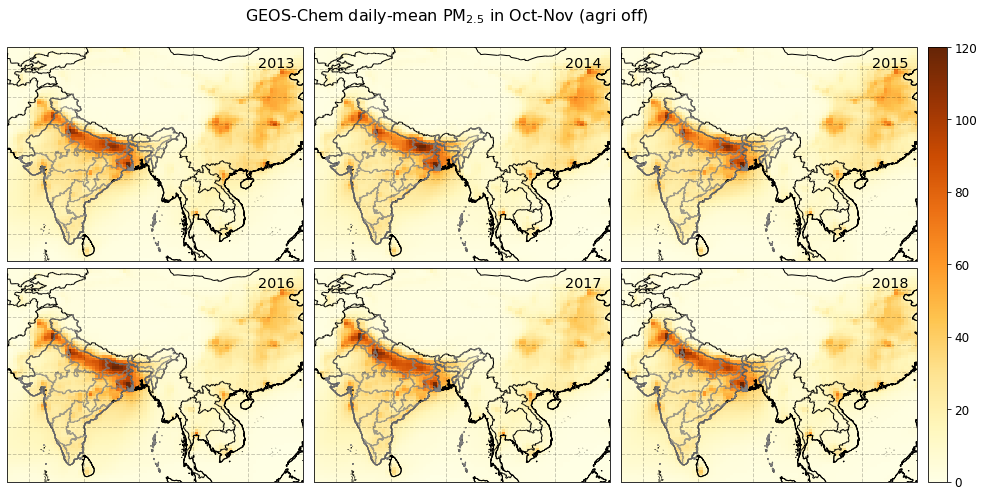

In [596]:
def read(path):
    ds = xr.open_dataset(path).isel(lev=0)
    ds = 2*ds['SpeciesConc_OCPO'] + 2*ds['SpeciesConc_OCPI'] + ds['SpeciesConc_BCPO'] + ds['SpeciesConc_BCPI']
    return ds[0]

color = plt.cm.YlOrBr
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = "Helvetica"
fig, a = plt.subplots(2, 3, figsize=(16.5, 8), subplot_kw={'projection': ccrs.PlateCarree()}, sharex=True, sharey=True)
xticks = None
years = np.arange(2013, 2019)
base = Path('/home/rlan/GC13/nested_1997_2019_agri_off')
for year, ax in zip(years, a.flatten()):
    year_dir_10  = base / f'nested_{year}_off' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}0930_0000z.nc4'
    year_dir_11  = base / f'nested_{year}_off' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}1030_0000z.nc4'
    PM = factor*(read(year_dir_10) + read(year_dir_11))/2
    img = PM.plot(ax=ax, 
              cmap=color,vmax=120, 
              add_colorbar=False)

    ax.set_title(f'{year}', x=0.91, y=1.0, pad=-20);
    ax.coastlines()
    ax.set_extent([66.0, 120.0, 5.0, 41])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                      draw_labels=False,
                      linewidth=1, color='black', 
                      alpha=0.2,
                      linestyle='--')
    
    gl.xlabels_top = False
    gl.ylabels_right = False
    ax.coastlines(color='black', 
                  linewidth=1, 
                  resolution='10m')
    ax.add_feature(cfeature.BORDERS.with_scale('10m'),
                   linestyle='-')

    india = '/home/rlan/GC13/India_shapefile/gadm36_IND_0.shp'
    shape_india = ShapelyFeature(Reader(india).geometries(), 
                                 ccrs.PlateCarree(), 
                                 edgecolor='brown', 
                                 alpha=0.5, 
                                 facecolor="none")
    ax.add_feature(shape_india)

    state = '/home/rlan/GC13/India_shapefile/gadm36_IND_1.shp'
    shape_states = ShapelyFeature(Reader(state).geometries(), 
                                  ccrs.PlateCarree(), 
                                  edgecolor='gray', 
                                  alpha=0.5, 
                                  facecolor="none")
    ax.add_feature(shape_states)

plt.suptitle(r'GEOS-Chem daily-mean $\rm PM_{2.5}$ in Oct-Nov (agri off)', fontsize=16, y= 0.95)
plt.subplots_adjust(wspace=0.001, hspace=0.03)

cbar_ax = fig.add_axes([0.905, 0.125, 0.016, 0.755])
fig.colorbar(img, cax=cbar_ax)
plt.show()

fig.savefig('/home/rlan/GC13/figures/agri_off.png',format='png', dpi=600)   # save the figure to file
plt.close(fig) 

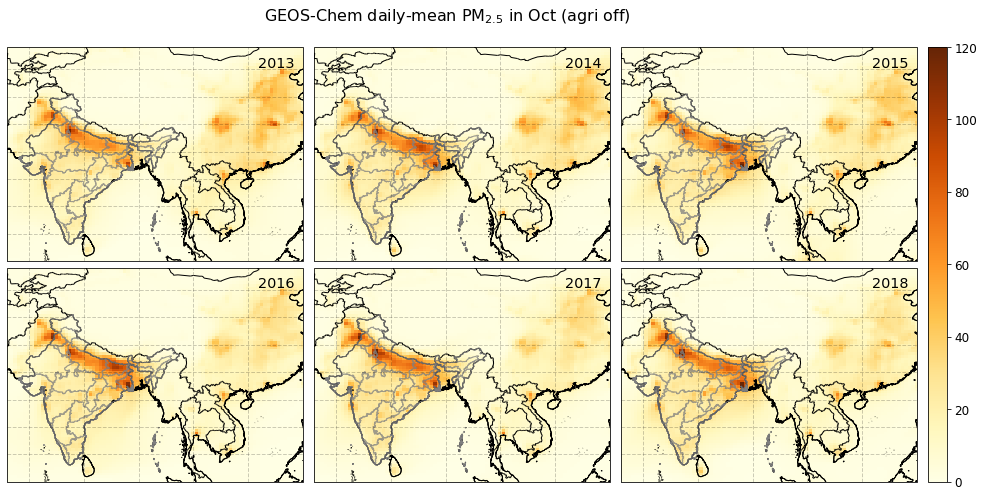

In [599]:
def read(path):
    ds = xr.open_dataset(path).isel(lev=0)
    ds = 2*ds['SpeciesConc_OCPO'] + 2*ds['SpeciesConc_OCPI'] + ds['SpeciesConc_BCPO'] + ds['SpeciesConc_BCPI']
    return ds[0]

color = plt.cm.YlOrBr
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = "Helvetica"
fig, a = plt.subplots(2, 3, figsize=(16.5, 8), subplot_kw={'projection': ccrs.PlateCarree()}, sharex=True, sharey=True)
xticks = None
years = np.arange(2013, 2019)
base = Path('/home/rlan/GC13/nested_1997_2019_agri_off')
for year, ax in zip(years, a.flatten()):
    year_dir_10  = base / f'nested_{year}_off' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}0930_0000z.nc4'
    #year_dir_11  = base / f'nested_{year}_off' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}1030_0000z.nc4'
    PM = factor * read(year_dir_10)
    img = PM.plot(ax=ax, 
              cmap=color,vmax=120, 
              add_colorbar=False)

    ax.set_title(f'{year}', x=0.91, y=1.0, pad=-20);
    ax.coastlines()
    ax.set_extent([66.0, 120.0, 5.0, 41])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                      draw_labels=False,
                      linewidth=1, color='black', 
                      alpha=0.2,
                      linestyle='--')
    
    gl.xlabels_top = False
    gl.ylabels_right = False
    ax.coastlines(color='black', 
                  linewidth=1, 
                  resolution='10m')
    ax.add_feature(cfeature.BORDERS.with_scale('10m'),
                   linestyle='-')

    india = '/home/rlan/GC13/India_shapefile/gadm36_IND_0.shp'
    shape_india = ShapelyFeature(Reader(india).geometries(), 
                                 ccrs.PlateCarree(), 
                                 edgecolor='brown', 
                                 alpha=0.5, 
                                 facecolor="none")
    ax.add_feature(shape_india)

    state = '/home/rlan/GC13/India_shapefile/gadm36_IND_1.shp'
    shape_states = ShapelyFeature(Reader(state).geometries(), 
                                  ccrs.PlateCarree(), 
                                  edgecolor='gray', 
                                  alpha=0.5, 
                                  facecolor="none")
    ax.add_feature(shape_states)

plt.suptitle(r'GEOS-Chem daily-mean $\rm PM_{2.5}$ in Oct (agri off)', fontsize=16, y= 0.95)
plt.subplots_adjust(wspace=0.001, hspace=0.03)

cbar_ax = fig.add_axes([0.905, 0.125, 0.016, 0.755])
fig.colorbar(img, cax=cbar_ax)
plt.show()

fig.savefig('/home/rlan/GC13/figures/agri_off_oct.png',format='png', dpi=600)   # save the figure to file
plt.close(fig) 

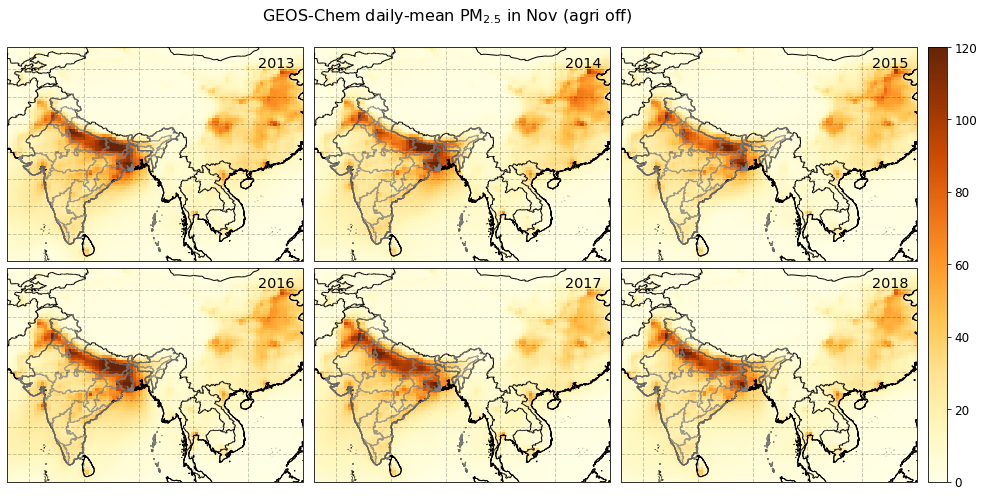

In [600]:
def read(path):
    ds = xr.open_dataset(path).isel(lev=0)
    ds = 2*ds['SpeciesConc_OCPO'] + 2*ds['SpeciesConc_OCPI'] + ds['SpeciesConc_BCPO'] + ds['SpeciesConc_BCPI']
    return ds[0]

color = plt.cm.YlOrBr
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = "Helvetica"
fig, a = plt.subplots(2, 3, figsize=(16.5, 8), subplot_kw={'projection': ccrs.PlateCarree()}, sharex=True, sharey=True)
xticks = None
years = np.arange(2013, 2019)
base = Path('/home/rlan/GC13/nested_1997_2019_agri_off')
for year, ax in zip(years, a.flatten()):
    #year_dir_10  = base / f'nested_{year}_off' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}0930_0000z.nc4'
    year_dir_11  = base / f'nested_{year}_off' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}1030_0000z.nc4'
    PM = factor * read(year_dir_11)
    img = PM.plot(ax=ax, 
              cmap=color,vmax=120, 
              add_colorbar=False)

    ax.set_title(f'{year}', x=0.91, y=1.0, pad=-20);
    ax.coastlines()
    ax.set_extent([66.0, 120.0, 5.0, 41])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                      draw_labels=False,
                      linewidth=1, color='black', 
                      alpha=0.2,
                      linestyle='--')
    
    gl.xlabels_top = False
    gl.ylabels_right = False
    ax.coastlines(color='black', 
                  linewidth=1, 
                  resolution='10m')
    ax.add_feature(cfeature.BORDERS.with_scale('10m'),
                   linestyle='-')

    india = '/home/rlan/GC13/India_shapefile/gadm36_IND_0.shp'
    shape_india = ShapelyFeature(Reader(india).geometries(), 
                                 ccrs.PlateCarree(), 
                                 edgecolor='brown', 
                                 alpha=0.5, 
                                 facecolor="none")
    ax.add_feature(shape_india)

    state = '/home/rlan/GC13/India_shapefile/gadm36_IND_1.shp'
    shape_states = ShapelyFeature(Reader(state).geometries(), 
                                  ccrs.PlateCarree(), 
                                  edgecolor='gray', 
                                  alpha=0.5, 
                                  facecolor="none")
    ax.add_feature(shape_states)

plt.suptitle(r'GEOS-Chem daily-mean $\rm PM_{2.5}$ in Nov (agri off)', fontsize=16, y= 0.95)
plt.subplots_adjust(wspace=0.001, hspace=0.03)

cbar_ax = fig.add_axes([0.905, 0.125, 0.016, 0.755])
fig.colorbar(img, cax=cbar_ax)
plt.show()

fig.savefig('/home/rlan/GC13/figures/agri_off_nov.png',format='png', dpi=600)   # save the figure to file
plt.close(fig) 

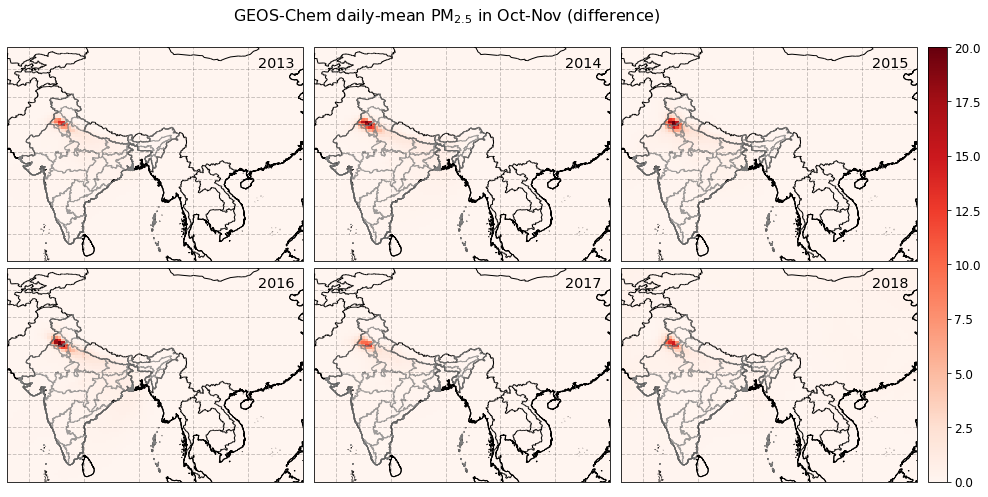

In [589]:
def read(path):
    ds = xr.open_dataset(path).isel(lev=0)
    ds = 2*ds['SpeciesConc_OCPO'] + 2*ds['SpeciesConc_OCPI'] + ds['SpeciesConc_BCPO'] + ds['SpeciesConc_BCPI']
    return ds[0]

color = plt.cm.Reds
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = "Helvetica"
fig, a = plt.subplots(2, 3, figsize=(16.5, 8), subplot_kw={'projection': ccrs.PlateCarree()}, sharex=True, sharey=True)
xticks = None
years = np.arange(2013, 2019)
base_on = Path('/home/rlan/GC13/nested_1997_2019')
base_off = Path('/home/rlan/GC13/nested_1997_2019_agri_off')
for year, ax in zip(years, a.flatten()):
    year_off_10 = base_off / f'nested_{year}_off' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}0930_0000z.nc4'
    year_off_11 = base_off / f'nested_{year}_off' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}1030_0000z.nc4' 
    year_on_10 = base_on / f'nested_{year}' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}0930_0000z.nc4'
    year_on_11 = base_on / f'nested_{year}' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}1030_0000z.nc4'
    #convert mol/mol to ug/m3
    factor = 24e+6 / 22.4 / 0.001
    PM = factor * ((read(year_on_10)+read(year_on_11)) - (read(year_off_10)+read(year_off_11))) / 4
    img = PM.plot(ax=ax, 
                  cmap=color,
                  vmax=20,
                  vmin=0,
                  add_colorbar=False)

    ax.set_title(f'{year}', x=0.91, y= 1, pad=-20);
    ax.coastlines()
    ax.set_extent([66.0, 120.0, 5.0, 41])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                      draw_labels=False,
                      linewidth=1, color='black', 
                      alpha=0.2,
                      linestyle='--')
    
    gl.xlabels_top = False
    gl.ylabels_right = False
    ax.coastlines(color='black', 
                  linewidth=1, 
                  resolution='10m')
    ax.add_feature(cfeature.BORDERS.with_scale('10m'),
                   linestyle='-')

    india = '/home/rlan/GC13/India_shapefile/gadm36_IND_0.shp'
    shape_india = ShapelyFeature(Reader(india).geometries(), 
                                 ccrs.PlateCarree(), 
                                 edgecolor='darkred', 
                                 alpha=0.5, 
                                 facecolor="none")
    ax.add_feature(shape_india)

    state = '/home/rlan/GC13/India_shapefile/gadm36_IND_1.shp'
    shape_states = ShapelyFeature(Reader(state).geometries(), 
                                  ccrs.PlateCarree(), 
                                  edgecolor='gray', 
                                  alpha=0.5, 
                                  facecolor="none")
    ax.add_feature(shape_states)

plt.suptitle(r'GEOS-Chem daily-mean $\rm PM_{2.5}$ in Oct-Nov (difference)', fontsize=16, y= 0.95)
plt.subplots_adjust(wspace=0.001, hspace=0.03)

cbar_ax = fig.add_axes([0.905, 0.125, 0.016, 0.755])
fig.colorbar(img, cax=cbar_ax)
plt.show()

fig.savefig('/home/rlan/GC13/figures/agri_diff.png',format='png', dpi=600)   # save the figure to file
plt.close(fig) 

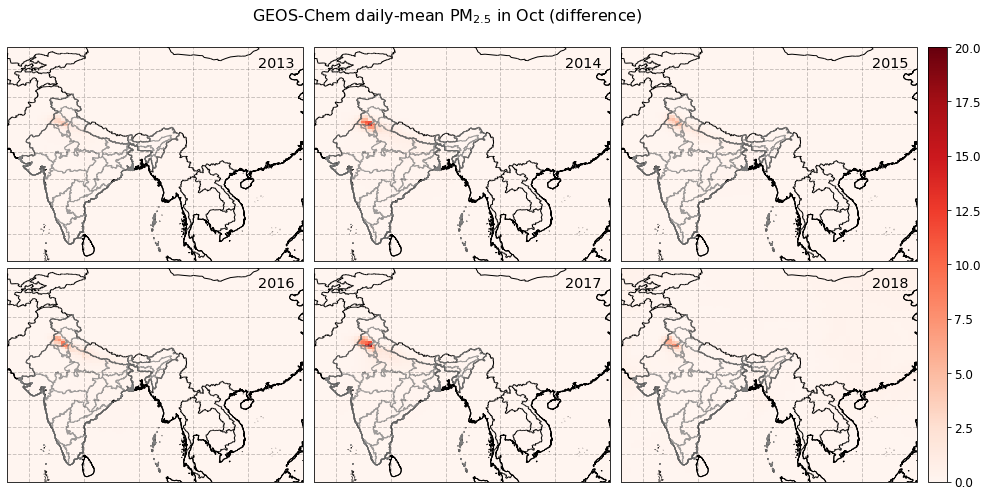

In [591]:
def read(path):
    ds = xr.open_dataset(path).isel(lev=0)
    ds = 2*ds['SpeciesConc_OCPO'] + 2*ds['SpeciesConc_OCPI'] + ds['SpeciesConc_BCPO'] + ds['SpeciesConc_BCPI']
    return ds[0]

color = plt.cm.Reds
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = "Helvetica"
fig, a = plt.subplots(2, 3, figsize=(16.5, 8), subplot_kw={'projection': ccrs.PlateCarree()}, sharex=True, sharey=True)
xticks = None
years = np.arange(2013, 2019)
base_on = Path('/home/rlan/GC13/nested_1997_2019')
base_off = Path('/home/rlan/GC13/nested_1997_2019_agri_off')
for year, ax in zip(years, a.flatten()):
    year_off_10 = base_off / f'nested_{year}_off' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}0930_0000z.nc4'
    year_off_11 = base_off / f'nested_{year}_off' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}1030_0000z.nc4' 
    year_on_10 = base_on / f'nested_{year}' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}0930_0000z.nc4'
    year_on_11 = base_on / f'nested_{year}' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}1030_0000z.nc4'
    #convert mol/mol to ug/m3
    factor = 24e+6 / 22.4 / 0.001
    #PM = factor * ((read(year_on_10)+read(year_on_11)) - (read(year_off_10)+read(year_off_11))) / 4
    PM = factor * ((read(year_on_10)) - (read(year_off_10))) / 2
    img = PM.plot(ax=ax, 
                  cmap=color,
                  vmax=20,
                  vmin=0,
                  add_colorbar=False)

    ax.set_title(f'{year}', x=0.91, y= 1, pad=-20);
    ax.coastlines()
    ax.set_extent([66.0, 120.0, 5.0, 41])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                      draw_labels=False,
                      linewidth=1, color='black', 
                      alpha=0.2,
                      linestyle='--')
    
    gl.xlabels_top = False
    gl.ylabels_right = False
    ax.coastlines(color='black', 
                  linewidth=1, 
                  resolution='10m')
    ax.add_feature(cfeature.BORDERS.with_scale('10m'),
                   linestyle='-')

    india = '/home/rlan/GC13/India_shapefile/gadm36_IND_0.shp'
    shape_india = ShapelyFeature(Reader(india).geometries(), 
                                 ccrs.PlateCarree(), 
                                 edgecolor='gray', 
                                 alpha=0.5, 
                                 facecolor="none")
    ax.add_feature(shape_india)

    state = '/home/rlan/GC13/India_shapefile/gadm36_IND_1.shp'
    shape_states = ShapelyFeature(Reader(state).geometries(), 
                                  ccrs.PlateCarree(), 
                                  edgecolor='darkred', 
                                  alpha=0.5, 
                                  facecolor="none")
    ax.add_feature(shape_states)

plt.suptitle(r'GEOS-Chem daily-mean $\rm PM_{2.5}$ in Oct (difference)', fontsize=16, y= 0.95)
plt.subplots_adjust(wspace=0.001, hspace=0.03)

cbar_ax = fig.add_axes([0.905, 0.125, 0.016, 0.755])
fig.colorbar(img, cax=cbar_ax)
plt.show()

fig.savefig('/home/rlan/GC13/figures/agri_diff_oct.png',format='png', dpi=600)   # save the figure to file
plt.close(fig) 

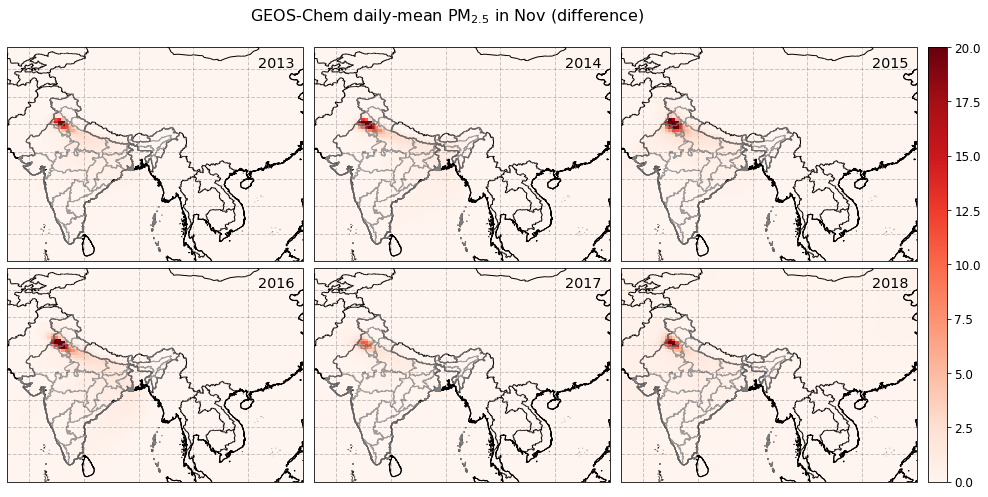

In [592]:
def read(path):
    ds = xr.open_dataset(path).isel(lev=0)
    ds = 2*ds['SpeciesConc_OCPO'] + 2*ds['SpeciesConc_OCPI'] + ds['SpeciesConc_BCPO'] + ds['SpeciesConc_BCPI']
    return ds[0]

color = plt.cm.Reds
plt.rcParams.update({'font.size': 12})
fig, a = plt.subplots(2, 3, figsize=(16.5, 8), subplot_kw={'projection': ccrs.PlateCarree()}, sharex=True, sharey=True)
xticks = None
years = np.arange(2013, 2019)
base_on = Path('/home/rlan/GC13/nested_1997_2019')
base_off = Path('/home/rlan/GC13/nested_1997_2019_agri_off')
for year, ax in zip(years, a.flatten()):
    year_off_10 = base_off / f'nested_{year}_off' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}0930_0000z.nc4'
    year_off_11 = base_off / f'nested_{year}_off' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}1030_0000z.nc4' 
    year_on_10 = base_on / f'nested_{year}' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}0930_0000z.nc4'
    year_on_11 = base_on / f'nested_{year}' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}1030_0000z.nc4'
    #convert mol/mol to ug/m3
    factor = 24e+6 / 22.4 / 0.001
    #PM = factor * ((read(year_on_10)+read(year_on_11)) - (read(year_off_10)+read(year_off_11))) / 2
    PM = factor * ((read(year_on_11)) - (read(year_off_11))) / 2
    img = PM.plot(ax=ax, 
                  cmap=color,
                  vmax=20,
                  vmin=0,
                  add_colorbar=False)

    ax.set_title(f'{year}', x=0.91, y=1, pad=-20);
    ax.coastlines()
    ax.set_extent([66.0, 120.0, 5.0, 41])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                      draw_labels=False,
                      linewidth=1, color='black', 
                      alpha=0.2,
                      linestyle='--')
    
    gl.xlabels_top = False
    gl.ylabels_right = False
    ax.coastlines(color='black', 
                  linewidth=1, 
                  resolution='10m')
    ax.add_feature(cfeature.BORDERS.with_scale('10m'),
                   linestyle='-')

    india = '/home/rlan/GC13/India_shapefile/gadm36_IND_0.shp'
    shape_india = ShapelyFeature(Reader(india).geometries(), 
                                 ccrs.PlateCarree(), 
                                 edgecolor='darkred', 
                                 alpha=0.5, 
                                 facecolor="none")
    ax.add_feature(shape_india)

    state = '/home/rlan/GC13/India_shapefile/gadm36_IND_1.shp'
    shape_states = ShapelyFeature(Reader(state).geometries(), 
                                  ccrs.PlateCarree(), 
                                  edgecolor='gray', 
                                  alpha=0.5, 
                                  facecolor="none")
    ax.add_feature(shape_states)

plt.suptitle(r'GEOS-Chem daily-mean $\rm PM_{2.5}$ in Nov (difference)', fontsize=16, y= 0.95)
plt.subplots_adjust(wspace=0.001, hspace=0.03)

cbar_ax = fig.add_axes([0.905, 0.125, 0.016, 0.755])
fig.colorbar(img, cax=cbar_ax)
plt.show()

fig.savefig('/home/rlan/GC13/figures/agri_diff_nov.png',format='png', dpi=600)   # save the figure to file
plt.close(fig) 

In [370]:
ds = xr.open_dataset(year_dir).isel(lev=0)

In [548]:
#28.6139° N, 77.2090° E 
#19.0760° N, 72.8777° E
#13.0827° N, 80.2707° E
ds.lon[21]
ds.lon[32]
ds.lat[60]
ds.lat[48]

<xarray.DataArray 'lat' ()>
array(13.)
Coordinates:
    lev      float64 0.9925
    lat      float64 13.0
Attributes:
    long_name:  Latitude
    units:      degrees_north
    axis:       Y

In [395]:
ds.lon

<xarray.DataArray 'lon' (lon: 145)>
array([ 60.   ,  60.625,  61.25 ,  61.875,  62.5  ,  63.125,  63.75 ,  64.375,
        65.   ,  65.625,  66.25 ,  66.875,  67.5  ,  68.125,  68.75 ,  69.375,
        70.   ,  70.625,  71.25 ,  71.875,  72.5  ,  73.125,  73.75 ,  74.375,
        75.   ,  75.625,  76.25 ,  76.875,  77.5  ,  78.125,  78.75 ,  79.375,
        80.   ,  80.625,  81.25 ,  81.875,  82.5  ,  83.125,  83.75 ,  84.375,
        85.   ,  85.625,  86.25 ,  86.875,  87.5  ,  88.125,  88.75 ,  89.375,
        90.   ,  90.625,  91.25 ,  91.875,  92.5  ,  93.125,  93.75 ,  94.375,
        95.   ,  95.625,  96.25 ,  96.875,  97.5  ,  98.125,  98.75 ,  99.375,
       100.   , 100.625, 101.25 , 101.875, 102.5  , 103.125, 103.75 , 104.375,
       105.   , 105.625, 106.25 , 106.875, 107.5  , 108.125, 108.75 , 109.375,
       110.   , 110.625, 111.25 , 111.875, 112.5  , 113.125, 113.75 , 114.375,
       115.   , 115.625, 116.25 , 116.875, 117.5  , 118.125, 118.75 , 119.375,
       120.   , 120.625, 121.25 , 121.875, 122.5  , 123.125, 123.75 , 124.375,
       125.   , 125.625, 126.25 , 126.875, 127.5  , 128.125, 128.75 , 129.375,
       130.   , 130.625, 131.25 , 131.875, 132.5  , 133.125, 133.75 , 134.375,
       135.   , 135.625, 136.25 , 136.875, 137.5  , 138.125, 138.75 , 139.375,
       140.   , 140.625, 141.25 , 141.875, 142.5  , 143.125, 143.75 , 144.375,
       145.   , 145.625, 146.25 , 146.875, 147.5  , 148.125, 148.75 , 149.375,
       150.   ])
Coordinates:
    lev      float64 0.9925
  * lon      (lon) float64 60.0 60.62 61.25 61.88 ... 148.1 148.8 149.4 150.0
Attributes:
    long_name:  Longitude
    units:      degrees_east
    axis:       X

In [398]:
ds.lat

<xarray.DataArray 'lat' (lat: 133)>
array([-11. , -10.5, -10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,
        -6. ,  -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,
        -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,
         4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
         9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,  12.5,  13. ,  13.5,
        14. ,  14.5,  15. ,  15.5,  16. ,  16.5,  17. ,  17.5,  18. ,  18.5,
        19. ,  19.5,  20. ,  20.5,  21. ,  21.5,  22. ,  22.5,  23. ,  23.5,
        24. ,  24.5,  25. ,  25.5,  26. ,  26.5,  27. ,  27.5,  28. ,  28.5,
        29. ,  29.5,  30. ,  30.5,  31. ,  31.5,  32. ,  32.5,  33. ,  33.5,
        34. ,  34.5,  35. ,  35.5,  36. ,  36.5,  37. ,  37.5,  38. ,  38.5,
        39. ,  39.5,  40. ,  40.5,  41. ,  41.5,  42. ,  42.5,  43. ,  43.5,
        44. ,  44.5,  45. ,  45.5,  46. ,  46.5,  47. ,  47.5,  48. ,  48.5,
        49. ,  49.5,  50. ,  50.5,  51. ,  51.5,  52. ,  52.5,  53. ,  53.5,
        54. ,  54.5,  55. ])
Coordinates:
    lev      float64 0.9925
  * lat      (lat) float64 -11.0 -10.5 -10.0 -9.5 -9.0 ... 53.5 54.0 54.5 55.0
Attributes:
    long_name:  Latitude
    units:      degrees_north
    axis:       Y

# Annual mean + meteorology

In [2]:
base = Path('/net/d07/data/rlan/from_hex/GC13_output/nested_on')
year = 2019
year_dir  = base / f'{year}' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}1001_0000z.nc4'
print(year_dir)

/net/d07/data/rlan/from_hex/GC13_output/nested_on/2019/Output_monthly/GEOSChem.SpeciesConc.20191001_0000z.nc4


In [3]:
def read(path):
    ds = xr.open_dataset(path).isel(lev=0)
    ds = 2*ds['SpeciesConc_OCPO'] + 2*ds['SpeciesConc_OCPI'] + ds['SpeciesConc_BCPO'] + ds['SpeciesConc_BCPI']
    return ds[0]

factor = 24e+6 / 22.4 / 0.001
years = np.arange(1997, 2020)
base = Path('/net/d07/data/rlan/from_hex/GC13_output/nested_on')
base_off = Path('/net/d07/data/rlan/from_hex/GC13_output/nested_off')
PM_annual_diff = []
PM_annual = []
for year in years:
    year_on_10  = base / f'{year}' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}0930_0000z.nc4'
    year_on_11  = base / f'{year}' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}1030_0000z.nc4'
    year_off_10  = base_off / f'{year}' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}0930_0000z.nc4'
    year_off_11  = base_off / f'{year}' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}1030_0000z.nc4'
    PM = factor*(read(year_on_10) + read(year_on_11))/2
    PM_diff = factor * ((read(year_on_10)+read(year_on_11)) - (read(year_off_10)+read(year_off_11))) / 4
    PM_annual.append(PM)
    PM_annual_diff.append(PM_diff)
PM_annual = np.array(PM_annual)
PM_mean = PM_annual.mean(axis=0)
PM_mean = xr.DataArray(PM_mean, coords=PM.coords)
PM_annual_diff = np.array(PM_annual_diff)
PM_mean_diff = PM_annual_diff.mean(axis=0)
PM_mean_diff = xr.DataArray(PM_mean_diff, coords=PM.coords)

In [4]:
PM_mean.shape

(133, 145)

# Get MERRA2 wind field

In [6]:
def get_files(path):
    arr = path.glob('*A3dyn.*')
    files = sorted(arr)
    return files

def read(path):
    ds = xr.open_dataset(path).isel(lev=3)
    U = ds['U'].mean(dim='time') 
    V = ds['V'].mean(dim='time')
    return U, V

Merra2 = Path('/net/d14/data/geoschem/forward/ExtData/GEOS_0.5x0.625/MERRA2')
wind_u = []
wind_v = []

for year in range(1997,2020):
    path_10 = Merra2 / f'{year}' / '10'
    path_11 = Merra2 / f'{year}' / '11'
    files = get_files(path_10) + get_files(path_11)
    for file in files:
        U, V = read(file) 
        wind_u.append(U/2)
        wind_v.append(V/2)
wind_u = np.array(wind_u)
wind_u = wind_u.mean(axis=0)
mean_u = xr.DataArray(wind_u, coords=U.coords)
wind_v = np.array(wind_v)
wind_v = wind_v.mean(axis=0)
mean_v = xr.DataArray(wind_v, coords=V.coords)

In [8]:
ds = xr.open_dataset(file)

In [10]:
def plot_india(ax):
    #ax.coastlines('50m',color='lightgrey')
    ax.set_extent([65.0, 100.0, 5.0, 40])
    gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                      draw_labels=False,
                      linewidth=1, 
                      color='black', 
                      alpha=0.2,
                      linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    ax.coastlines(color='black', linewidth=1, resolution='10m')
    ax.add_feature(cfeature.BORDERS.with_scale('10m'),
                  linestyle='-',)
    india = '/home/rlan/GC13/India_shapefile/gadm36_IND_0.shp'
    shape_india = ShapelyFeature(Reader(india).geometries(), 
                                 ccrs.PlateCarree(), 
                                 edgecolor='black', 
                                 alpha=0.5, 
                                 facecolor="none")
    ax.add_feature(shape_india)

    state = '/home/rlan/GC13/India_shapefile/gadm36_IND_1.shp'
    shape_states = ShapelyFeature(Reader(state).geometries(), 
                                  ccrs.PlateCarree(), 
                                  edgecolor='black', 
                                  alpha=0.5, 
                                  facecolor="none")
    ax.add_feature(shape_states)

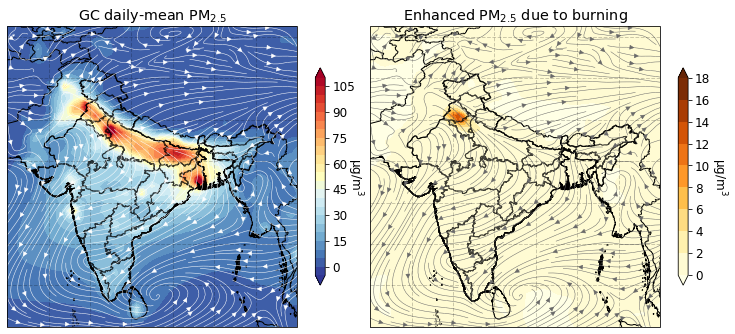

In [12]:
# A1 10M
from cartopy.util import add_cyclic_point
fig, axes = plt.subplots(1, 2, figsize=(13, 10), subplot_kw={'projection': ccrs.PlateCarree()})
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = "Helvetica"

# plot PM25
field, lon = add_cyclic_point(PM_mean, coord=PM.lon)
cf = axes[0].contourf(lon, PM.lat, field, 
                      levels=np.arange(-5, 115, 5),
                      cmap='RdYlBu_r',
                      extend='both',
                      transform=ccrs.PlateCarree())
plot_india(axes[0])
# plot wind field
uvel, lonu = add_cyclic_point(mean_u, coord=ds.lon)
vvel, lonv = add_cyclic_point(mean_v, coord=ds.lon)
sp = axes[0].streamplot(lonu, ds.lat, uvel, vvel,
                        linewidth=0.5,
                        arrowsize=0.8,
                        arrowstyle='Simple',
                        density=2,
                        color='w',
                        transform=ccrs.PlateCarree())
# add colorbar
cb = fig.colorbar(cf, ax=axes[0], pad=0.05, shrink=0.4)
axes[0].set_title('GC daily-mean PM$_{2.5}$');
cb.set_label('μg/m$^{3}$',rotation=270,labelpad=10)


# A1 10M
# plot PM25
field, lon = add_cyclic_point(PM_mean_diff, coord=PM.lon)
cf = axes[1].contourf(lon, PM.lat, field, 
                      levels=np.arange(0, 20, 2),
                      cmap='YlOrBr',
                      extend='both',
                      transform=ccrs.PlateCarree())
plot_india(axes[1])
# plot wind field
uvel, lonu = add_cyclic_point(mean_u, coord=ds.lon)
vvel, lonv = add_cyclic_point(mean_v, coord=ds.lon)
sp = axes[1].streamplot(lonu, ds.lat, uvel, vvel,
                        linewidth=0.5,
                        arrowsize=0.8,
                        arrowstyle='Simple',
                        density=2,
                        color='dimgrey',
                        transform=ccrs.PlateCarree())
# add colorbar
cb = fig.colorbar(cf, ax=axes[1], pad=0.05, shrink=0.4)
axes[1].set_title('Enhanced PM$_{2.5}$ due to burning');
cb.set_label('μg/m$^{3}$',rotation=270,labelpad=18)

plt.subplots_adjust(wspace=0.001)

#fig.savefig('/home/rlan/GC13/figures/annual_mean_PM25_diff_met.png',format='png', dpi=600)   # save the figure to file
#plt.close(fig) 

In [13]:
fig.savefig('/home/rlan/GC13/figures/annual_mean_PM25_diff_met.png',format='png', dpi=600)   # save the figure to file

Text(0, 0.5, 'μg/m$^{3}$')

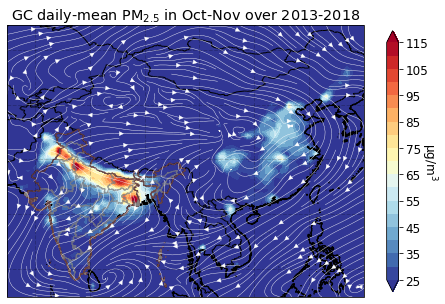

In [14]:
# A3dyn 10m
from cartopy.util import add_cyclic_point
fig = plt.figure(figsize=(8, 8))
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = "Helvetica"
# create axis with subplot a project
crs_latlon = ccrs.PlateCarree()
ax = fig.add_subplot(1, 1, 1, projection=crs_latlon)
ax.set_extent([60.0, 130.0, 5.0, 50], crs=crs_latlon)
ax.coastlines('50m')

# plot PM25
field, lon = add_cyclic_point(PM_mean, coord=PM.lon)
cf = ax.contourf(lon, PM.lat, field, 
                 levels=np.arange(25, 120, 5),
                 cmap='RdYlBu_r',
                 #cmap='YlOrBr',
                 extend='both',
                 transform=ccrs.PlateCarree())
plot_india(ax)

# plot wind field
uvel, lonu = add_cyclic_point(mean_u, coord=ds.lon)
vvel, lonv = add_cyclic_point(mean_v, coord=ds.lon)

#lonu = np.where(lonu>=180.,lonu-360.,lonu)

sp = ax.streamplot(lonu, ds.lat, uvel, vvel,
                   linewidth=0.4,
                   arrowsize=0.8,
                   arrowstyle='Simple',
                   density=2,
                   color='w',
                   transform=ccrs.PlateCarree())

# add colorbar
cb = plt.colorbar(cf, pad=0.05, shrink=0.6)
ax.set_title('GC daily-mean PM$_{2.5}$ in Oct-Nov over 2013-2018');
cb.ax.set_ylabel('μg/m$^{3}$',rotation=270,labelpad=10)

In [15]:
def get_files(path):
    arr = path.glob('*A1.*')
    files = sorted(arr)
    return files

def read(path):
    ds = xr.open_dataset(path)
    U = ds['U10M'].mean(dim='time')
    V = ds['V10M'].mean(dim='time')
    return U, V

Merra2 = Path('/net/d14/data/geoschem/forward/ExtData/GEOS_0.5x0.625/MERRA2')
wind_u = []
wind_v = []

for year in range(2013,2019):
    path_10 = Merra2 / f'{year}' / '10'
    path_11 = Merra2 / f'{year}' / '11'
    files = get_files(path_10) + get_files(path_11)
    for file in files:
        U, V = read(file)
        wind_u.append(U)
        wind_v.append(V)
wind_u = np.array(wind_u)
wind_u = wind_u.mean(axis=0)
mean_u = xr.DataArray(wind_u, coords=U.coords)
wind_v = np.array(wind_v)
wind_v = wind_v.mean(axis=0)
mean_v = xr.DataArray(wind_v, coords=V.coords)

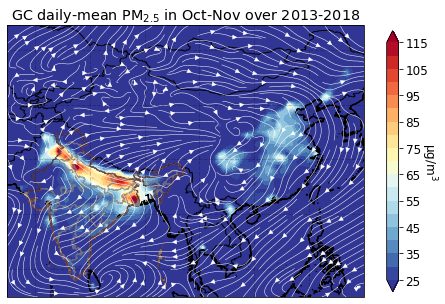

In [20]:
# A1 10M
from cartopy.util import add_cyclic_point
fig = plt.figure(figsize=(8, 8))
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = "Helvetica"
# create axis with subplot a project
crs_latlon = ccrs.PlateCarree()
ax = fig.add_subplot(1, 1, 1, projection=crs_latlon)
ax.set_extent([60.0, 130.0, 5.0, 50], crs=crs_latlon)
ax.coastlines('50m')
# plot PM25
field, lon = add_cyclic_point(PM_mean, coord=PM.lon)
cf = ax.contourf(lon, PM.lat, field, 
                 levels=np.arange(25, 120, 5),
                 cmap='RdYlBu_r',
                 #cmap='YlOrBr',
                 extend='both',
                 transform=ccrs.PlateCarree())
plot_india(ax)
# plot wind field
uvel, lonu = add_cyclic_point(mean_u, coord=ds.lon)
vvel, lonv = add_cyclic_point(mean_v, coord=ds.lon)
sp = ax.streamplot(lonu, ds.lat, uvel, vvel,
                   linewidth=0.5,
                   arrowsize=0.8,
                   arrowstyle='Simple',
                   density=2,
                   color='w',
                   transform=ccrs.PlateCarree())
# add colorbar
cb = plt.colorbar(cf, pad=0.05, shrink=0.6)
ax.set_title('GC daily-mean PM$_{2.5}$ in Oct-Nov over 2013-2018');
cb.ax.set_ylabel('μg/m$^{3}$',rotation=270,labelpad=10)

fig.savefig('/home/rlan/GC13/figures/annual_mean_PM25.png',format='png', dpi=600)   # save the figure to file
#plt.close(fig) 

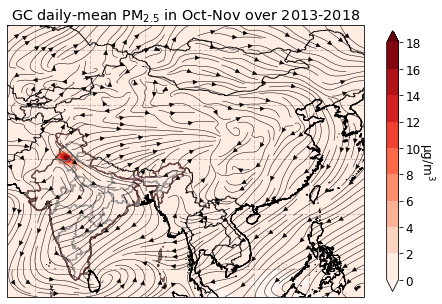

In [19]:
# A1 10M
from cartopy.util import add_cyclic_point
fig = plt.figure(figsize=(8, 8))
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = "Helvetica"
# create axis with subplot a project
crs_latlon = ccrs.PlateCarree()
ax = fig.add_subplot(1, 1, 1, projection=crs_latlon)
ax.set_extent([60.0, 130.0, 5.0, 50], crs=crs_latlon)
ax.coastlines('50m')
# plot PM25
field, lon = add_cyclic_point(PM_mean_diff, coord=PM.lon)
cf = ax.contourf(lon, PM.lat, field, 
                 levels=np.arange(0, 20, 2),
                 cmap='Reds',
                 #cmap='YlOrBr',
                 extend='both',
                 transform=ccrs.PlateCarree())
plot_india(ax)
# plot wind field
uvel, lonu = add_cyclic_point(mean_u, coord=ds.lon)
vvel, lonv = add_cyclic_point(mean_v, coord=ds.lon)
sp = ax.streamplot(lonu, ds.lat, uvel, vvel,
                   linewidth=0.5,
                   arrowsize=0.8,
                   arrowstyle='Simple',
                   density=2,
                   color='k',
                   transform=ccrs.PlateCarree())
# add colorbar
cb = plt.colorbar(cf, pad=0.05, shrink=0.6)
ax.set_title('GC daily-mean PM$_{2.5}$ in Oct-Nov over 2013-2018');
cb.ax.set_ylabel('μg/m$^{3}$',rotation=270,labelpad=15)

fig.savefig('/home/rlan/GC13/figures/annual_mean_PM25_diff.png',format='png', dpi=600)   # save the figure to file
#plt.close(fig) 

In [172]:
ds = xr.open_dataset('/home/rlan/inventory/Bangladesh_mask_0.625x0.5.nc')
ds

<xarray.Dataset>
Dimensions:    (lat: 133, lon: 145)
Coordinates:
    time       datetime64[ns] ...
  * lon        (lon) float64 60.0 60.62 61.25 61.88 ... 148.1 148.8 149.4 150.0
  * lat        (lat) float64 -11.0 -10.5 -10.0 -9.5 -9.0 ... 53.5 54.0 54.5 55.0
Data variables:
    CountryID  (lat, lon) float64 ...

# get three countries

In [37]:
def read(path):
    ds = xr.open_dataset(path).isel(lev=0)
    ds = 2*ds['SpeciesConc_OCPO'] + 2*ds['SpeciesConc_OCPI'] + ds['SpeciesConc_BCPO'] + ds['SpeciesConc_BCPI']
    return ds[0]

ds = xr.open_dataset('/home/rlan/inventory/Bangladesh_mask_0.625x0.5.nc')
bangladesh_mask = ds['CountryID']
ds = xr.open_dataset('/home/rlan/inventory/Nepal_mask_0.625x0.5.nc')
nepal_mask = ds['CountryID']
ds = xr.open_dataset('/home/rlan/inventory/Pakistan_mask_0.625x0.5.nc')
pakistan_mask = ds['CountryID']

bangladesh = []
nepal = []
pakistan = []

factor = 24e+6 / 22.4 / 0.001

years = np.arange(1997, 2020)
base = Path('/net/d07/data/rlan/from_hex/GC13_output/nested_on')
base_off = Path('/net/d07/data/rlan/from_hex/GC13_output/nested_off')

for year in years:
    if year == 2018:
        year_on_10  = base / f'{year}' / 'Output_monthly_old' / f'GEOSChem.SpeciesConc.{year}1001_0000z.nc4'
        year_on_11  = base / f'{year}' / 'Output_monthly_old' / f'GEOSChem.SpeciesConc.{year}1101_0000z.nc4'
    else:
        year_on_10  = base / f'{year}' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}0930_0000z.nc4'
        year_on_11  = base / f'{year}' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}1030_0000z.nc4'
    year_off_10  = base_off / f'{year}' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}0930_0000z.nc4'
    year_off_11  = base_off / f'{year}' / 'Output_monthly' / f'GEOSChem.SpeciesConc.{year}1030_0000z.nc4'
    PM_diff = factor * ((read(year_on_10)+read(year_on_11)) - (read(year_off_10)+read(year_off_11))) / 4
    diff = PM_diff.sel(lon=slice(65,100),lat=slice(5,40))
#     diff_all.append(diff)
#     diff_all_india.append(diff * india_mask.sel(lon=slice(65,100),lat=slice(5,40)))
    diff_bangladesh = diff * bangladesh_mask.sel(lon=slice(65,100),lat=slice(5,40))
    diff_nepal = diff * nepal_mask.sel(lon=slice(65,100),lat=slice(5,40))
    diff_pakistan = diff * pakistan_mask.sel(lon=slice(65,100),lat=slice(5,40))
    bangladesh.append(100*np.array(diff_bangladesh.sum()/diff.sum()))
    nepal.append(100*np.array(diff_nepal.sum()/diff.sum()))
    pakistan.append(100*np.array(diff_pakistan.sum()/diff.sum()))
print("Bangladesh: " + str(np.round(bangladesh,3)))
print("Nepal: " + str(np.round(nepal,3)))
print("Pakistan: " + str(np.round(pakistan,3)))
    


Bangladesh: [1.256 0.742 0.953 0.814 0.675 0.578 1.584 3.449 0.244 0.957 0.54  0.304
 1.142 0.776 0.926 3.269 1.244 3.073 1.041 1.679 1.285 2.124 1.032]
Nepal: [2.246 0.741 0.832 2.194 3.406 1.771 1.404 0.469 0.963 2.259 1.479 1.405
 1.055 1.486 2.556 4.774 3.006 3.683 3.548 3.246 3.105 2.666 2.011]
Pakistan: [11.191  6.101  6.786 10.88   6.551 12.371  5.496  4.194  7.481  9.727
  4.617  9.87   9.1    8.759  7.718  0.683  3.282  2.844  5.006  3.964
  7.603  4.726 10.183]


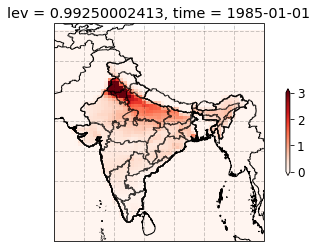

In [159]:
fig = plt.figure(figsize=[8, 4])
ax = plt.axes(projection=ccrs.PlateCarree())
(diff_masked).plot(ax=ax, cmap=color,vmin=0,vmax=3, add_colorbar=True, cbar_kwargs={'shrink': 0.4})
plot_india(ax)
ax.set_extent([65.0, 100.0, 5.0, 40])

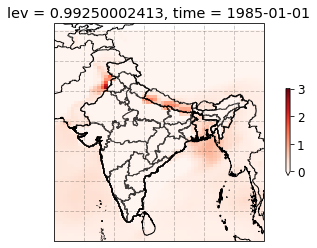

In [160]:
fig = plt.figure(figsize=[8, 4])
ax = plt.axes(projection=ccrs.PlateCarree())
(diff-diff_masked).plot(ax=ax, cmap=color,vmin=0,vmax=3, add_colorbar=True, cbar_kwargs={'shrink': 0.4})
plot_india(ax)
ax.set_extent([65.0, 100.0, 5.0, 40])
ax.set_title('India_masked')

In [163]:
np.array(diff_masked.sum()/diff.sum())

array(0.55640017)

In [162]:
diff_masked.sum()/diff.sum()

<xarray.DataArray ()>
array(0.55640017)
Coordinates:
    lev      float64 0.9925
    time     datetime64[ns] 1985-01-01